## Problem Statement: 
Customer churn is one of the main problems in the telecommunications industry. Retaining high profitable customers is their number one business goal. Customer retention has become even more important than customer acquisition. Therefore, companies are focusing on developing accurate and reliable predictive models to identify potential customers that will churn in the near future. The aim is to build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Data understanding and Exploration

In [3]:
# Importing all libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [4]:
# Reading dataset
Telecomdata = pd.read_csv("telecom_churn_data.csv")
Telecomdata.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
Telecomdata.columns.values

array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6',
       'std_og_t2t

In [6]:
# Checking the data types
Telecomdata.dtypes

mobile_number             int64
circle_id                 int64
loc_og_t2o_mou          float64
std_og_t2o_mou          float64
loc_ic_t2o_mou          float64
last_date_of_month_6     object
last_date_of_month_7     object
last_date_of_month_8     object
last_date_of_month_9     object
arpu_6                  float64
arpu_7                  float64
arpu_8                  float64
arpu_9                  float64
onnet_mou_6             float64
onnet_mou_7             float64
onnet_mou_8             float64
onnet_mou_9             float64
offnet_mou_6            float64
offnet_mou_7            float64
offnet_mou_8            float64
offnet_mou_9            float64
roam_ic_mou_6           float64
roam_ic_mou_7           float64
roam_ic_mou_8           float64
roam_ic_mou_9           float64
roam_og_mou_6           float64
roam_og_mou_7           float64
roam_og_mou_8           float64
roam_og_mou_9           float64
loc_og_t2t_mou_6        float64
                         ...   
arpu_2g_

## Filtering high value customer

In [7]:
# Finding columns with recharge info

tot_rech_cols = [col for col in Telecomdata.columns if 'total_rech_' in col]
print(tot_rech_cols)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9']


In [8]:
#Derive Total Data Recharge Amounts

Telecomdata["total_rech_data_amt_6"] = Telecomdata["total_rech_data_6"]  * Telecomdata['av_rech_amt_data_6']
Telecomdata["total_rech_data_amt_7"] = Telecomdata["total_rech_data_7"]  * Telecomdata['av_rech_amt_data_7']
Telecomdata["total_rech_data_amt_8"] = Telecomdata["total_rech_data_8"]  * Telecomdata['av_rech_amt_data_8']
Telecomdata["total_rech_data_amt_9"] = Telecomdata["total_rech_data_9"]  * Telecomdata['av_rech_amt_data_9']

In [9]:
# Drop total_rech_data_* and av_rech_amt_data_*

drop_col = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
Telecomdata.drop(drop_col, axis=1, inplace=True)

In [10]:
#Average recharge amount of 6th and 7th months

av_rech_amt_6_7 = (Telecomdata["total_rech_amt_6"].fillna(0) + Telecomdata["total_rech_data_amt_6"].fillna(0) + 
Telecomdata["total_rech_amt_7"].fillna(0) + Telecomdata["total_rech_data_amt_7"].fillna(0))/2.0

#70th % of average recharge amount
p70_6_7 = np.percentile(av_rech_amt_6_7, 70.0)
print('70th % of 6th and 7th months avg recharge amount = ', p70_6_7)

df_high_val_cust = Telecomdata[av_rech_amt_6_7 >= p70_6_7]
print('Dataframe shape after filtering High Value Customers = ', df_high_val_cust.shape)

70th % of 6th and 7th months avg recharge amount =  478.0
Dataframe shape after filtering High Value Customers =  (30001, 222)


### Data preparation

In [11]:
# Ccolumns with unqiue value

col_list = df_high_val_cust.loc[:,df_high_val_cust.apply(pd.Series.nunique) == 1]
col_list.head(5)

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN
7,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
8,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Removing such identical columns

df_high_val_cust = df_high_val_cust.loc[:,df_high_val_cust.apply(pd.Series.nunique) != 1]

In [13]:
# Making column names readable

df_high_val_cust.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

In [14]:
# Changing data type of columns

object_col_data = df_high_val_cust.select_dtypes(include=['object'])
print(object_col_data.iloc[0])

# convert to datetime
for col in object_col_data.columns:
    df_high_val_cust[col] = pd.to_datetime(df_high_val_cust[col])

date_of_last_rech_6         6/21/2014
date_of_last_rech_7         7/16/2014
date_of_last_rech_8          8/8/2014
date_of_last_rech_9         9/28/2014
date_of_last_rech_data_6    6/21/2014
date_of_last_rech_data_7    7/16/2014
date_of_last_rech_data_8     8/8/2014
date_of_last_rech_data_9          NaN
Name: 0, dtype: object


In [15]:
# Dropping columns with greater than 30% missing values excluding September month

columns = df_high_val_cust.columns
percent_missing = df_high_val_cust.isnull().sum() * 100 / len(df_high_val_cust)
missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})

drop_col = missing_value_df.loc[(missing_value_df["column_name"].str.contains('_9')==False) & (missing_value_df["percent_missing"] > 30.0)]["column_name"]
drop_col

date_of_last_rech_data_6    date_of_last_rech_data_6
date_of_last_rech_data_7    date_of_last_rech_data_7
date_of_last_rech_data_8    date_of_last_rech_data_8
max_rech_data_6                      max_rech_data_6
max_rech_data_7                      max_rech_data_7
max_rech_data_8                      max_rech_data_8
count_rech_2g_6                      count_rech_2g_6
count_rech_2g_7                      count_rech_2g_7
count_rech_2g_8                      count_rech_2g_8
count_rech_3g_6                      count_rech_3g_6
count_rech_3g_7                      count_rech_3g_7
count_rech_3g_8                      count_rech_3g_8
arpu_3g_6                                  arpu_3g_6
arpu_3g_7                                  arpu_3g_7
arpu_3g_8                                  arpu_3g_8
arpu_2g_6                                  arpu_2g_6
arpu_2g_7                                  arpu_2g_7
arpu_2g_8                                  arpu_2g_8
night_pck_user_6                    night_pck_

In [16]:
df_high_val_cust.drop(drop_col, axis=1, inplace=True)

# dropping rows with complete null values

df_high_val_cust = df_high_val_cust.dropna(how='all',axis=0)

# Finding Columns with unique value - insignificant frequency
for col_name in df_high_val_cust.columns:
    if (len(df_high_val_cust[col_name].unique()) <= 8):
        print(df_high_val_cust[col_name].value_counts())
        print(f"\n{35 * '-'}")

0.0    14952
1.0      268
Name: night_pck_user_9, dtype: int64

-----------------------------------
0    25394
1     4021
2      551
3       28
4        7
Name: monthly_2g_6, dtype: int64

-----------------------------------
0    25241
1     4071
2      649
3       33
4        5
5        2
Name: monthly_2g_7, dtype: int64

-----------------------------------
0    25854
1     3737
2      370
3       30
4        8
5        2
Name: monthly_2g_8, dtype: int64

-----------------------------------
0    26445
1     3175
2      346
3       30
4        5
Name: monthly_2g_9, dtype: int64

-----------------------------------
1.0    13564
0.0     1656
Name: fb_user_9, dtype: int64

-----------------------------------


In [17]:
# Dropping highly correlated columns

cor = df_high_val_cust.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.60) | (cor < -0.60)].sort_values()

monthly_3g_6        vol_3g_mb_6         0.601308
total_ic_mou_7      loc_ic_t2t_mou_7    0.601684
arpu_2g_9           count_rech_3g_9     0.602386
total_og_mou_8      onnet_mou_9         0.603450
total_rech_amt_8    arpu_6              0.603673
roam_og_mou_8       roam_og_mou_7       0.604862
offnet_mou_8        offnet_mou_6        0.604877
total_ic_mou_8      loc_ic_t2t_mou_8    0.605243
std_ic_mou_6        std_ic_t2m_mou_7    0.606225
std_og_mou_9        std_og_t2m_mou_8    0.606539
arpu_2g_9           vol_3g_mb_8         0.606779
std_ic_mou_7        std_ic_t2m_mou_8    0.606866
loc_og_mou_6        loc_og_t2t_mou_7    0.607059
vbc_3g_8            vol_3g_mb_8         0.607689
std_og_mou_8        std_og_t2m_mou_9    0.608170
std_og_mou_9        offnet_mou_9        0.608690
total_rech_amt_8    total_rech_amt_6    0.609306
total_og_mou_6      std_og_t2t_mou_6    0.610417
total_rech_amt_6    arpu_8              0.610687
std_og_mou_7        std_og_t2t_mou_8    0.611096
roam_ic_mou_8       

In [18]:
drop_col_list = ['loc_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_9','std_og_t2m_mou_6',
                'std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2m_mou_9','total_og_mou_6','total_og_mou_7','total_og_mou_8',
                'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2t_mou_9','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2m_mou_9',
                'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2m_mou_9','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9','arpu_2g_9','count_rech_2g_9','count_rech_3g_9','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2t_mou_9','loc_og_t2f_mou_8','loc_og_t2f_mou_9',
                'loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2m_mou_9','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_t2f_mou_9',
                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
                 
df_high_val_cust.drop(drop_col_list, axis=1, inplace=True)

### TAG CHURNERS

In [19]:
df_high_val_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00
8,34.91,142.18,0.00,0.00
21,252.61,1031.53,0.00,0.00
23,127.48,127.63,13.93,314.74


In [20]:
# For churned customers, assigning churn = 1 else 0 
df_high_val_cust['churn'] = np.where(df_high_val_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 
                                   1,
                                   0)

In [21]:
# Removing all september related columns

drop_cols = [col for col in df_high_val_cust.columns if '_9' in col]
print(drop_cols)

df_high_val_cust.drop(drop_cols, axis=1, inplace=True)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'max_rech_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'vbc_3g_9', 'total_rech_data_amt_9']


In [22]:
# Distribution graphs of column data

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [23]:
# Correlation matrix

def plotCorrelationMatrix(df, graphWidth):
    filename = "Telecom Churn"
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [24]:
# Scatter and density plots

def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number])
    
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]
    columnNames = list(df)
    if len(columnNames) > 10: 
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

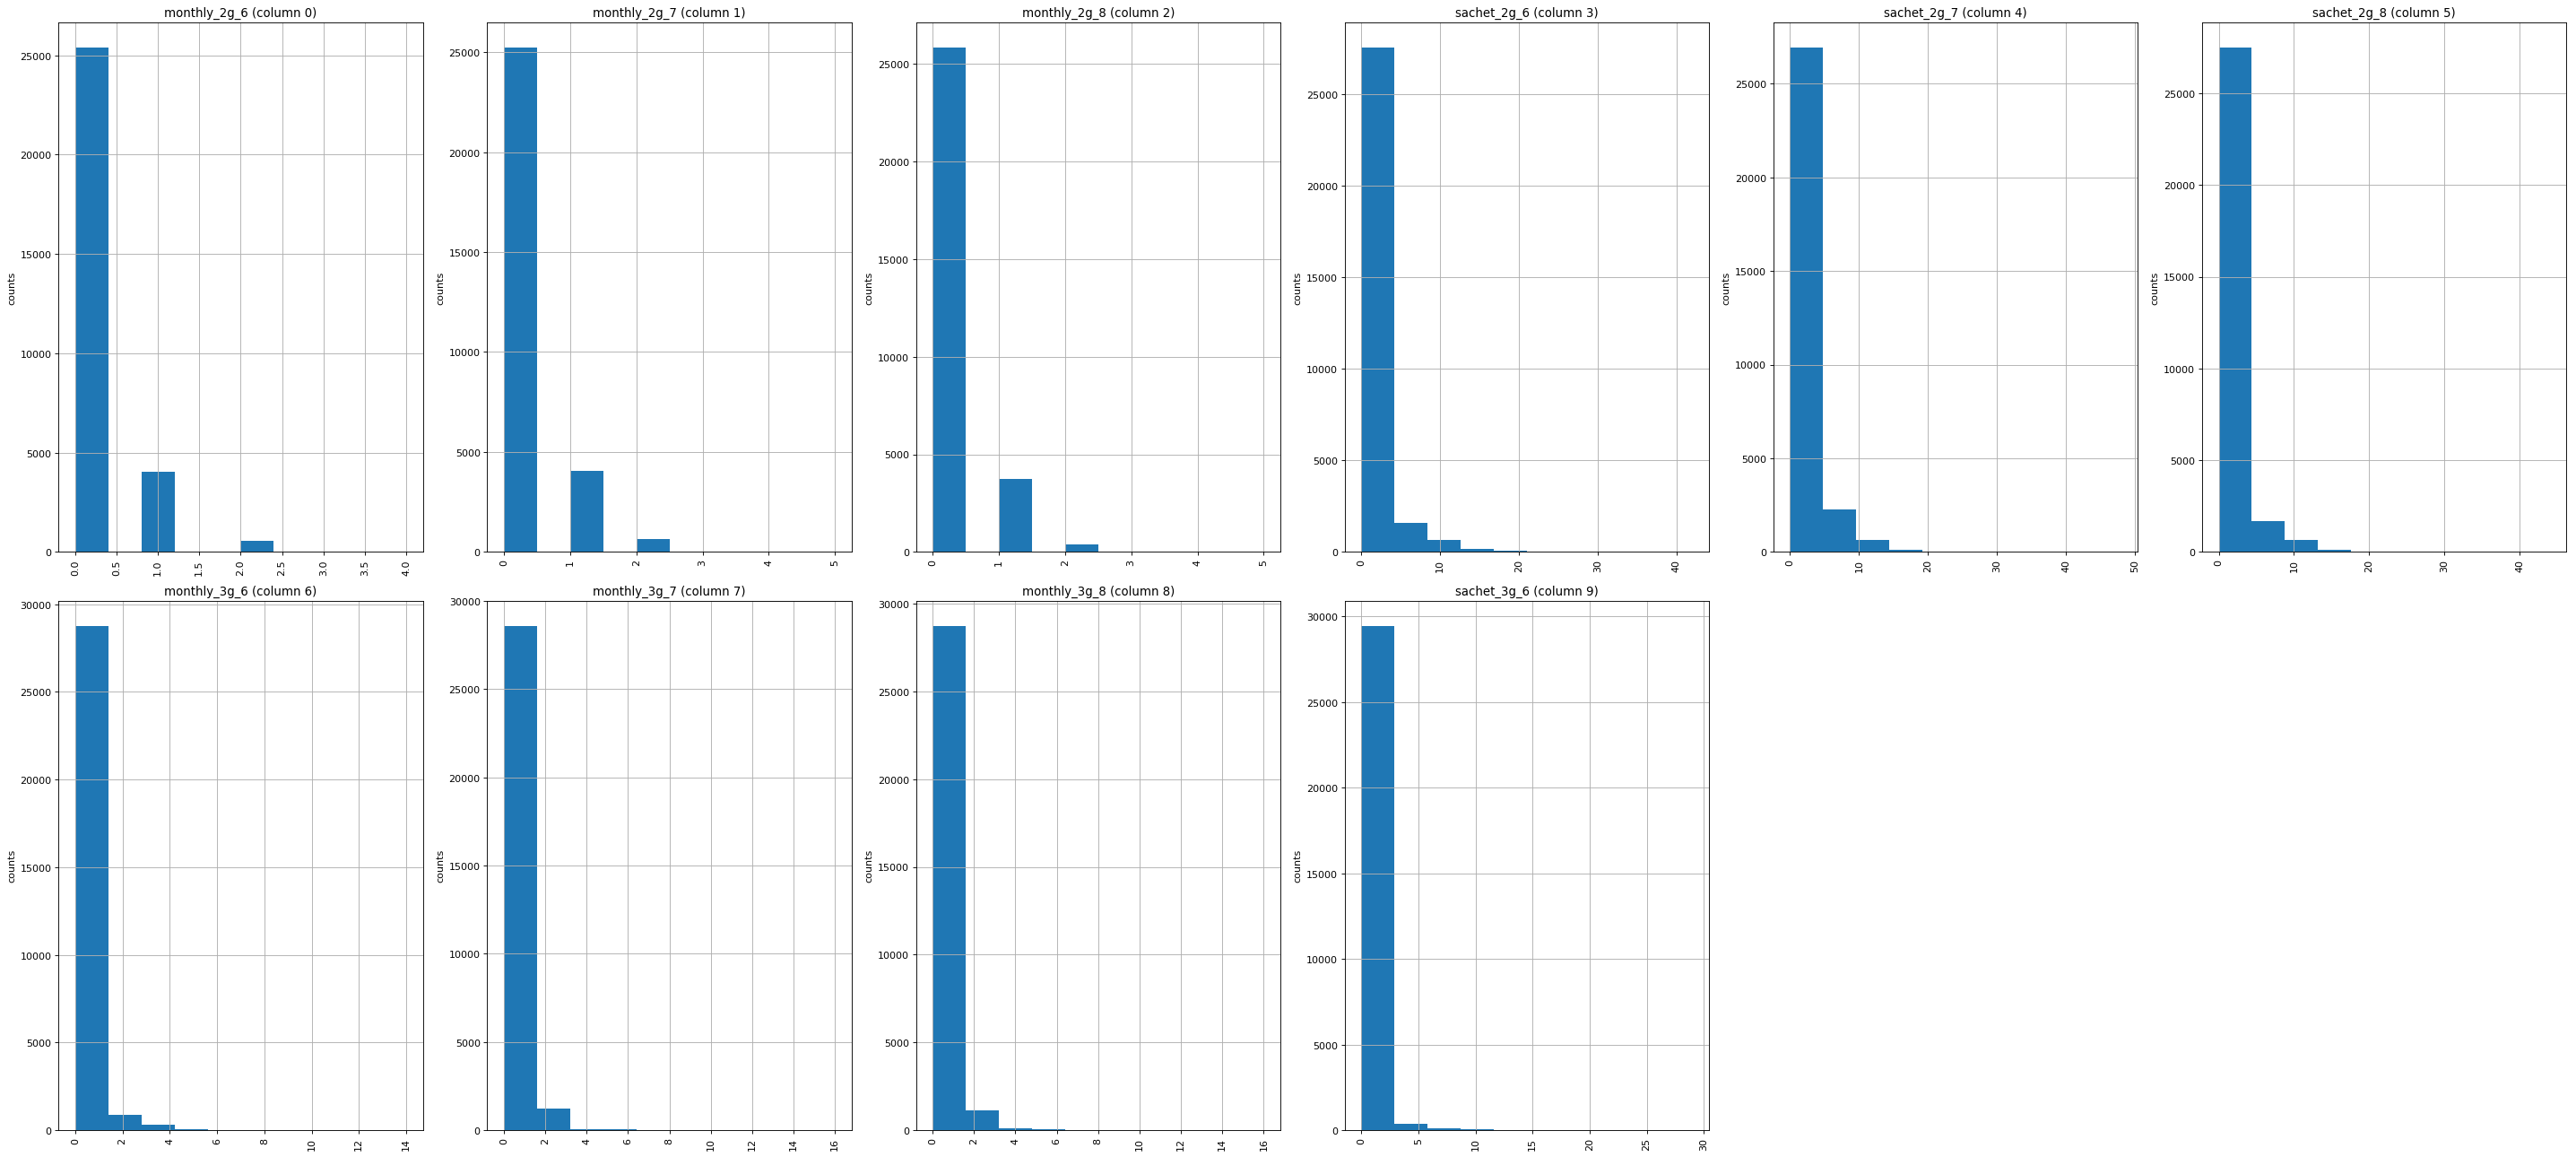

In [25]:
# Distribution graphs of sampled columns

plotPerColumnDistribution(df_high_val_cust, 10, 6)

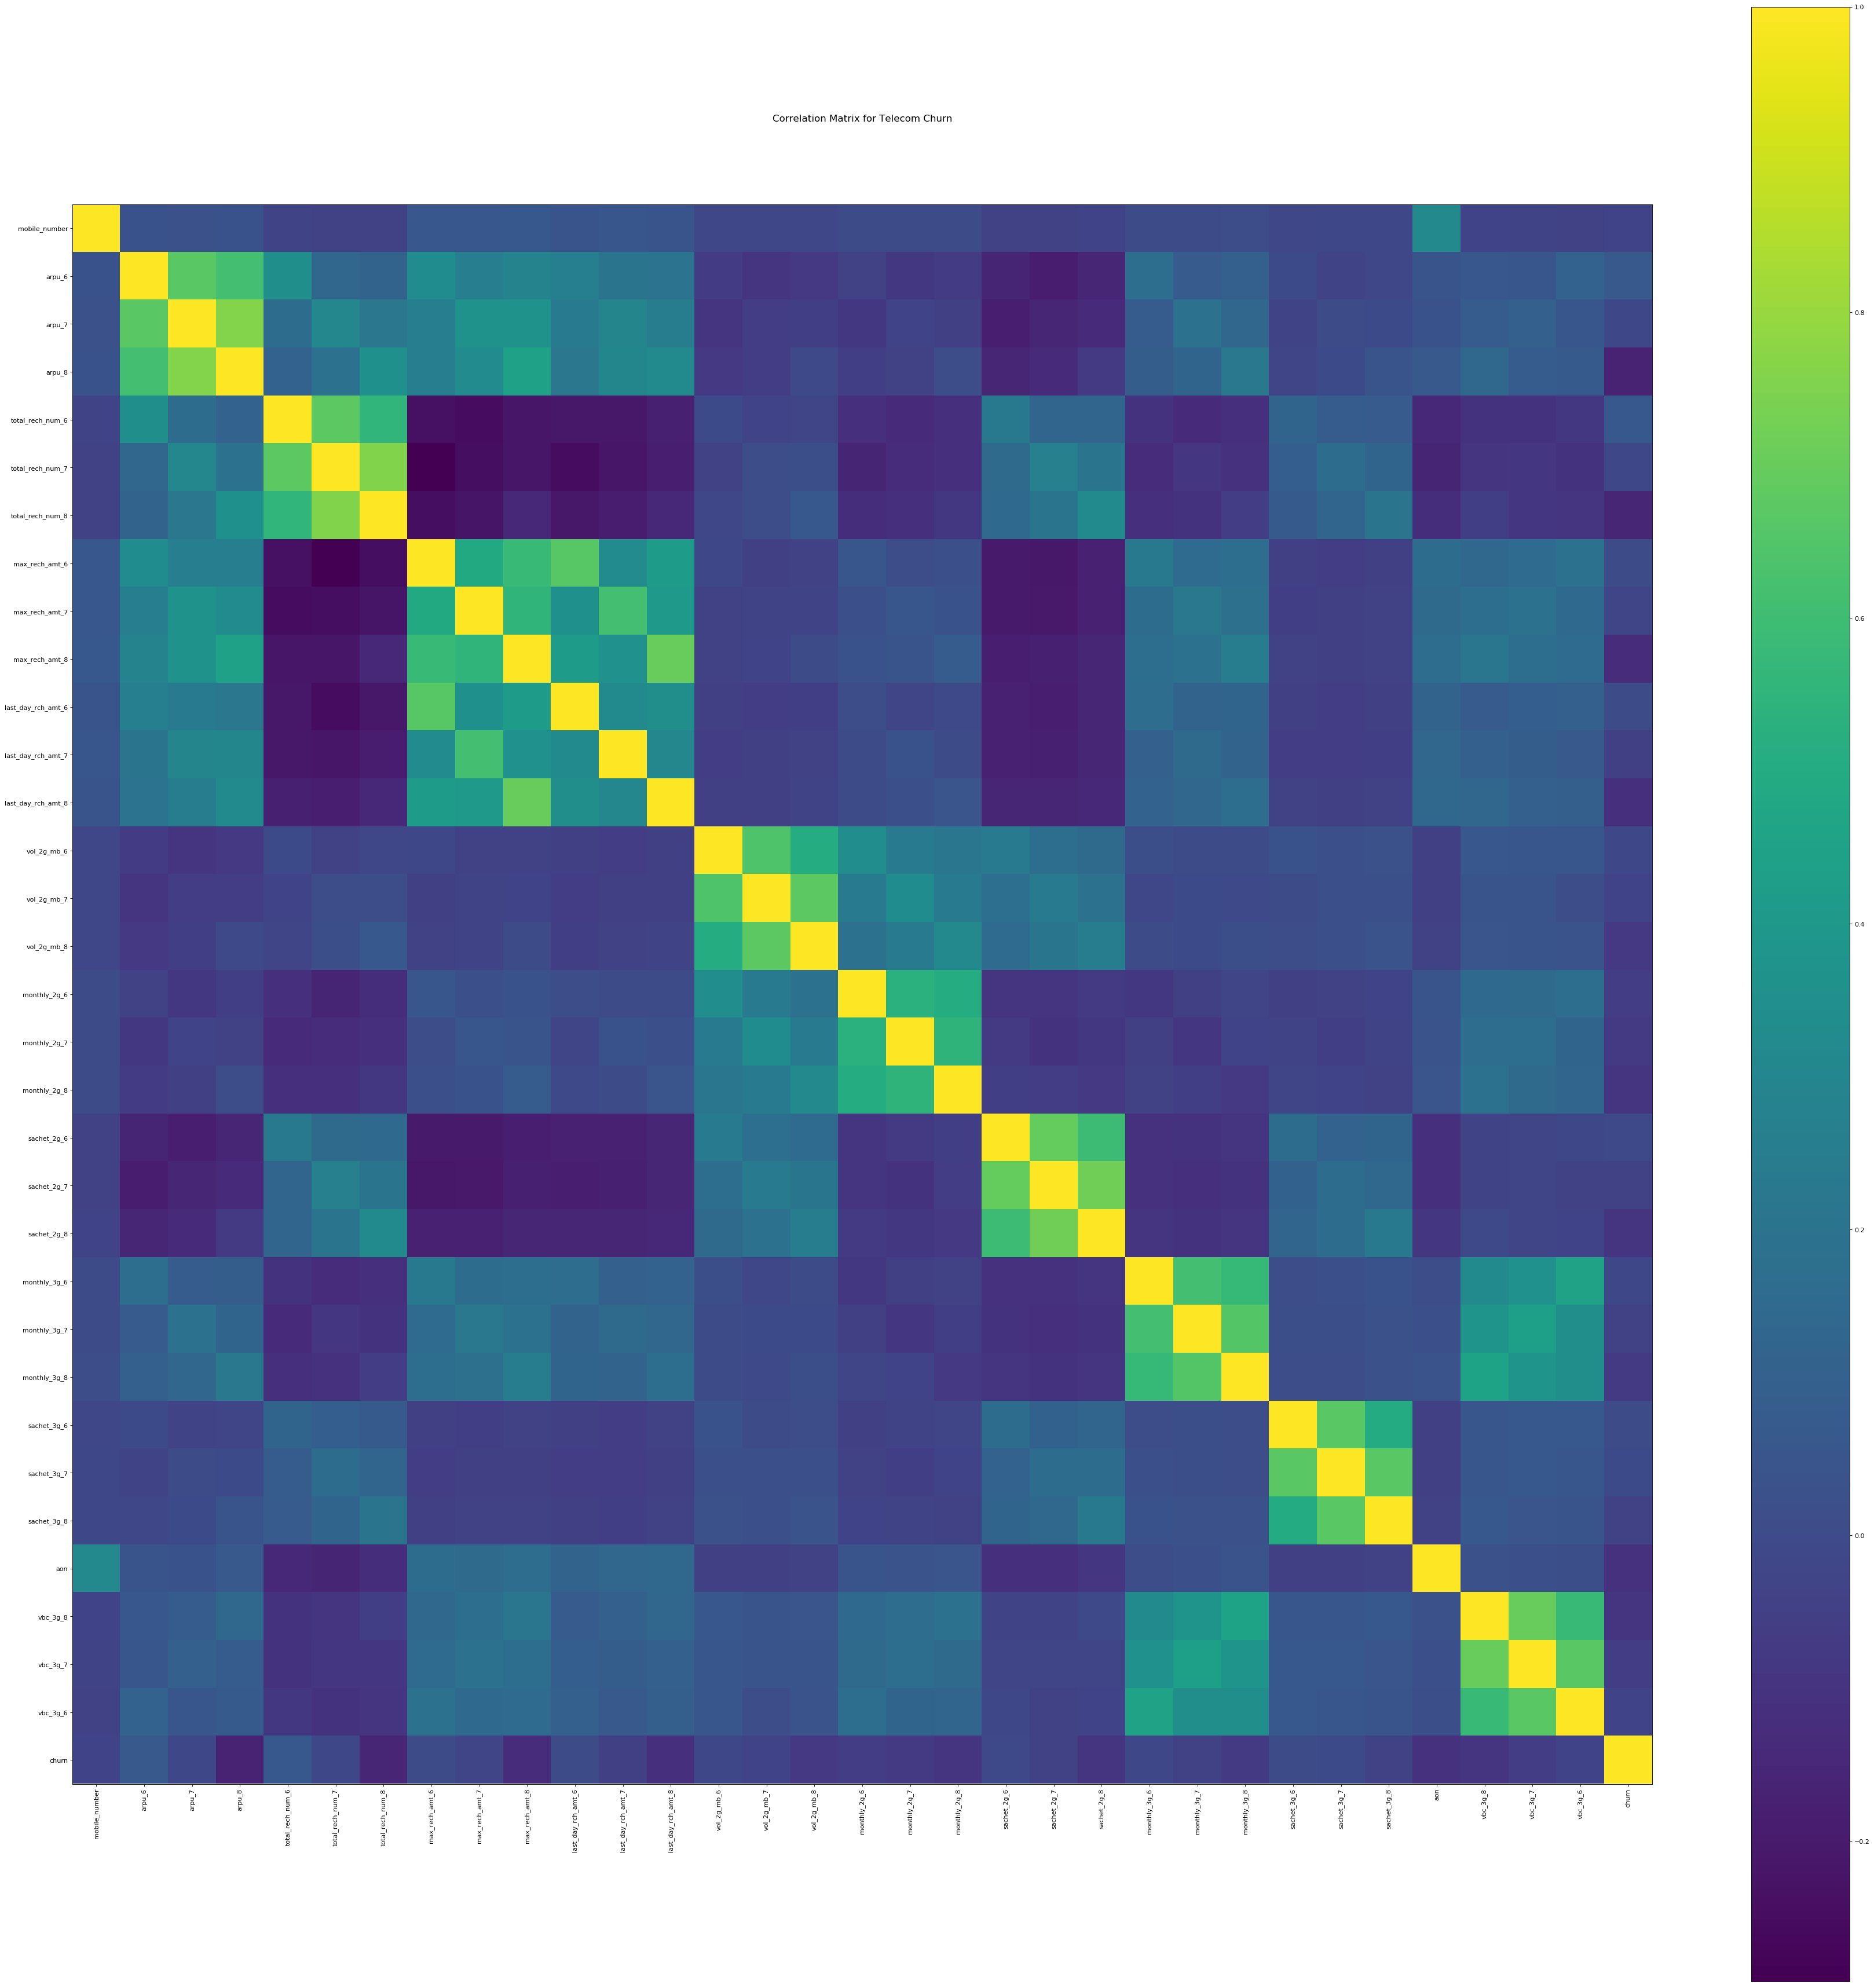

In [26]:
# Corelation matrix
plotCorrelationMatrix(df_high_val_cust, 55)

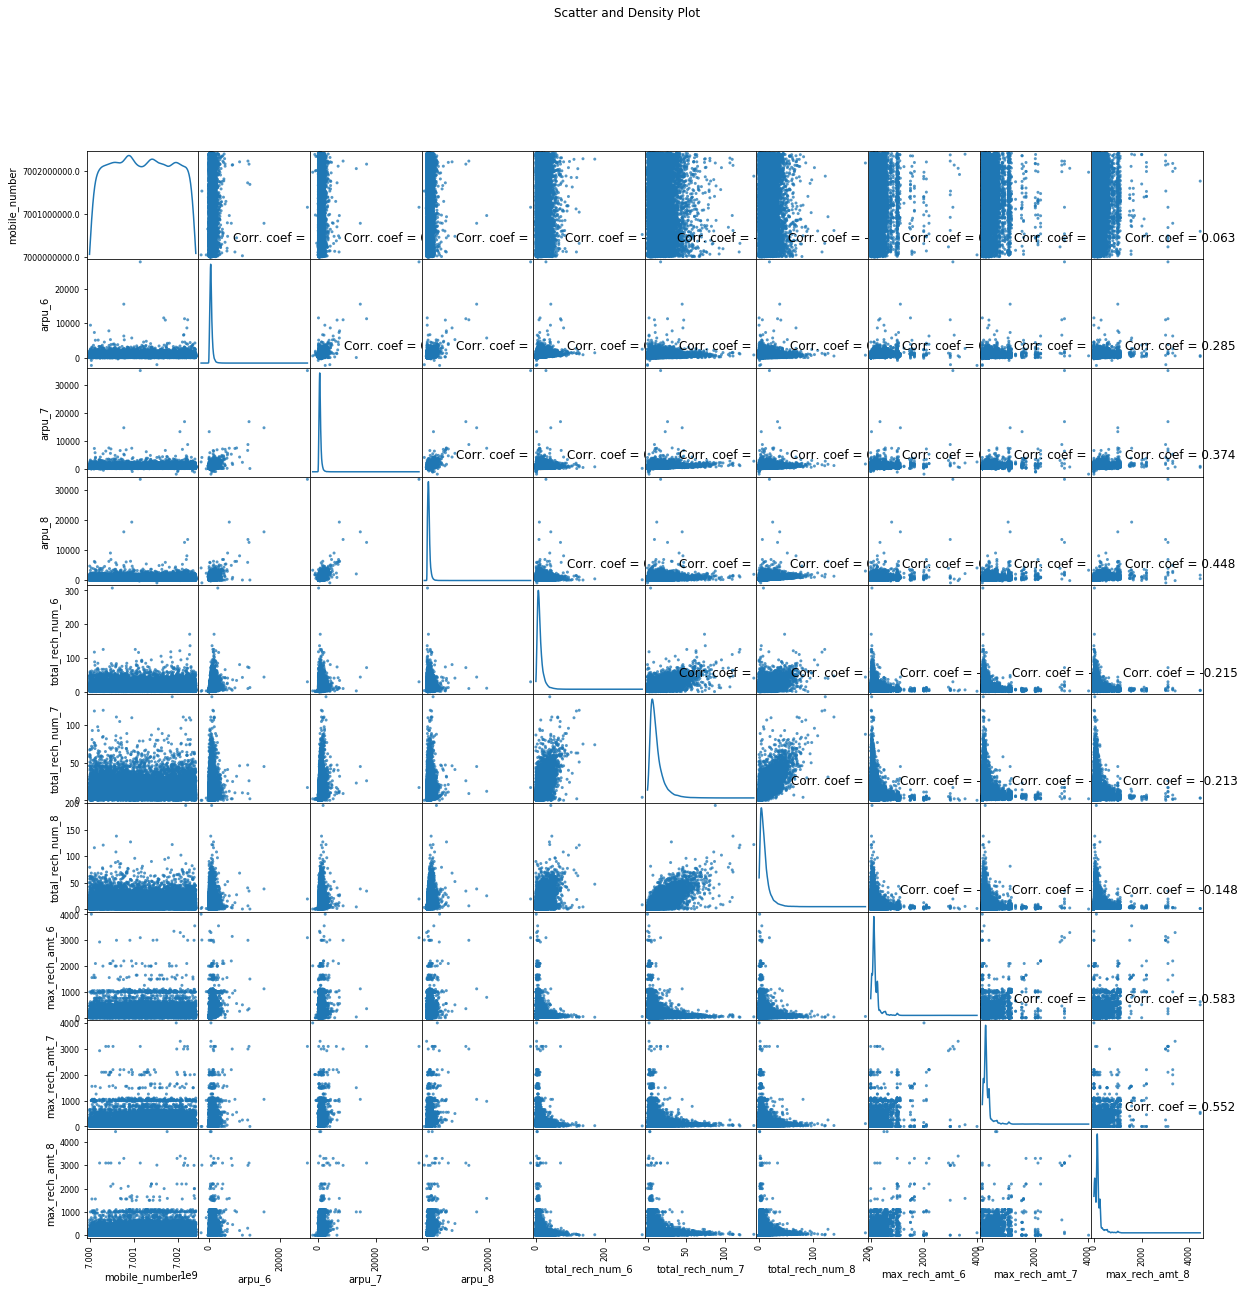

In [27]:
plotScatterMatrix(df_high_val_cust, 20, 12)

In [28]:
df_high_val_cust.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,...,1,1,0,0,0,968,30.40,0.00,101.20,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,0,0,0,0,0,802,57.74,19.38,18.74,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,0,0,0,0,0,315,21.03,910.65,122.16,0
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,0,0,0,0,0,720,0.00,0.00,0.00,0
23,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,...,2,1,0,0,1,604,40.45,51.86,0.00,0


In [29]:
# Reducing columns by Creating new meaningful features

col_list = df_high_val_cust.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()

print (df_high_val_cust.shape)

for idx, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    df_high_val_cust[avg_col_name] = (df_high_val_cust[col_6]  + df_high_val_cust[col_7])/ 2
col_list = df_high_val_cust.filter(regex='_6|_7').columns

df_high_val_cust.drop(col_list, axis=1, inplace=True)

df_high_val_cust.head()

(30001, 89)
arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2f_mou
loc_og_t2c_mou
loc_og_mou
std_og_t2f_mou
std_og_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_mou
std_ic_t2t_mou
std_ic_t2f_mou
std_ic_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
max_rech_amt
last_day_rch_amt
vol_2g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
vbc_3g


,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,...,avg_ic_others_av67,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67
0,7000842753,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,3.5,252.0,252.0,15.725,0.0,0.0,1.0,0.0,50.600
7,7000701601,3171.480,52.29,325.91,31.64,38.06,0.00,255.79,16.68,77.84,...,15.465,5.0,1185.0,0.0,0.000,0.0,0.0,0.0,0.0,19.060
8,7001524846,137.362,35.08,136.48,0.00,0.00,7.15,63.04,0.00,98.28,...,0.000,20.0,122.0,25.0,178.000,0.5,0.5,0.0,0.0,516.405
21,7002124215,637.760,85.14,983.39,0.00,0.00,0.00,129.74,0.00,938.79,...,0.000,24.0,50.0,25.0,0.000,0.0,0.0,0.0,0.0,0.000
23,7000887461,366.966,33.58,205.89,0.00,0.00,17.71,182.14,0.00,39.61,...,2.675,4.0,89.5,89.5,0.240,0.0,0.0,1.0,0.0,25.930


In [30]:
# Conevrt AON in Months

df_high_val_cust['aon_mon'] = df_high_val_cust['aon']/30
df_high_val_cust.drop('aon', axis=1, inplace=True)
df_high_val_cust['aon_mon'].head()

0     32.266667
7     26.733333
8     10.500000
21    24.000000
23    20.133333
Name: aon_mon, dtype: float64

Text(0.5, 1.0, 'Churn Distribution')

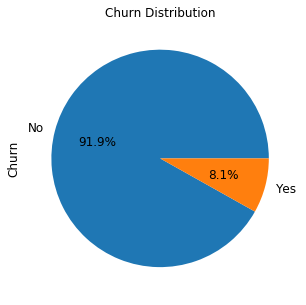

In [31]:
#Churn Distribution

ax = (df_high_val_cust['churn'].value_counts()*100.0 /len(df_high_val_cust)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           

ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)

From the data, 91.9% of customers do not churn. The data is skewed as the expectation would be a majority of customers to not churn. Skewness in data to be avoided during modelling.

Plots of sampled columns

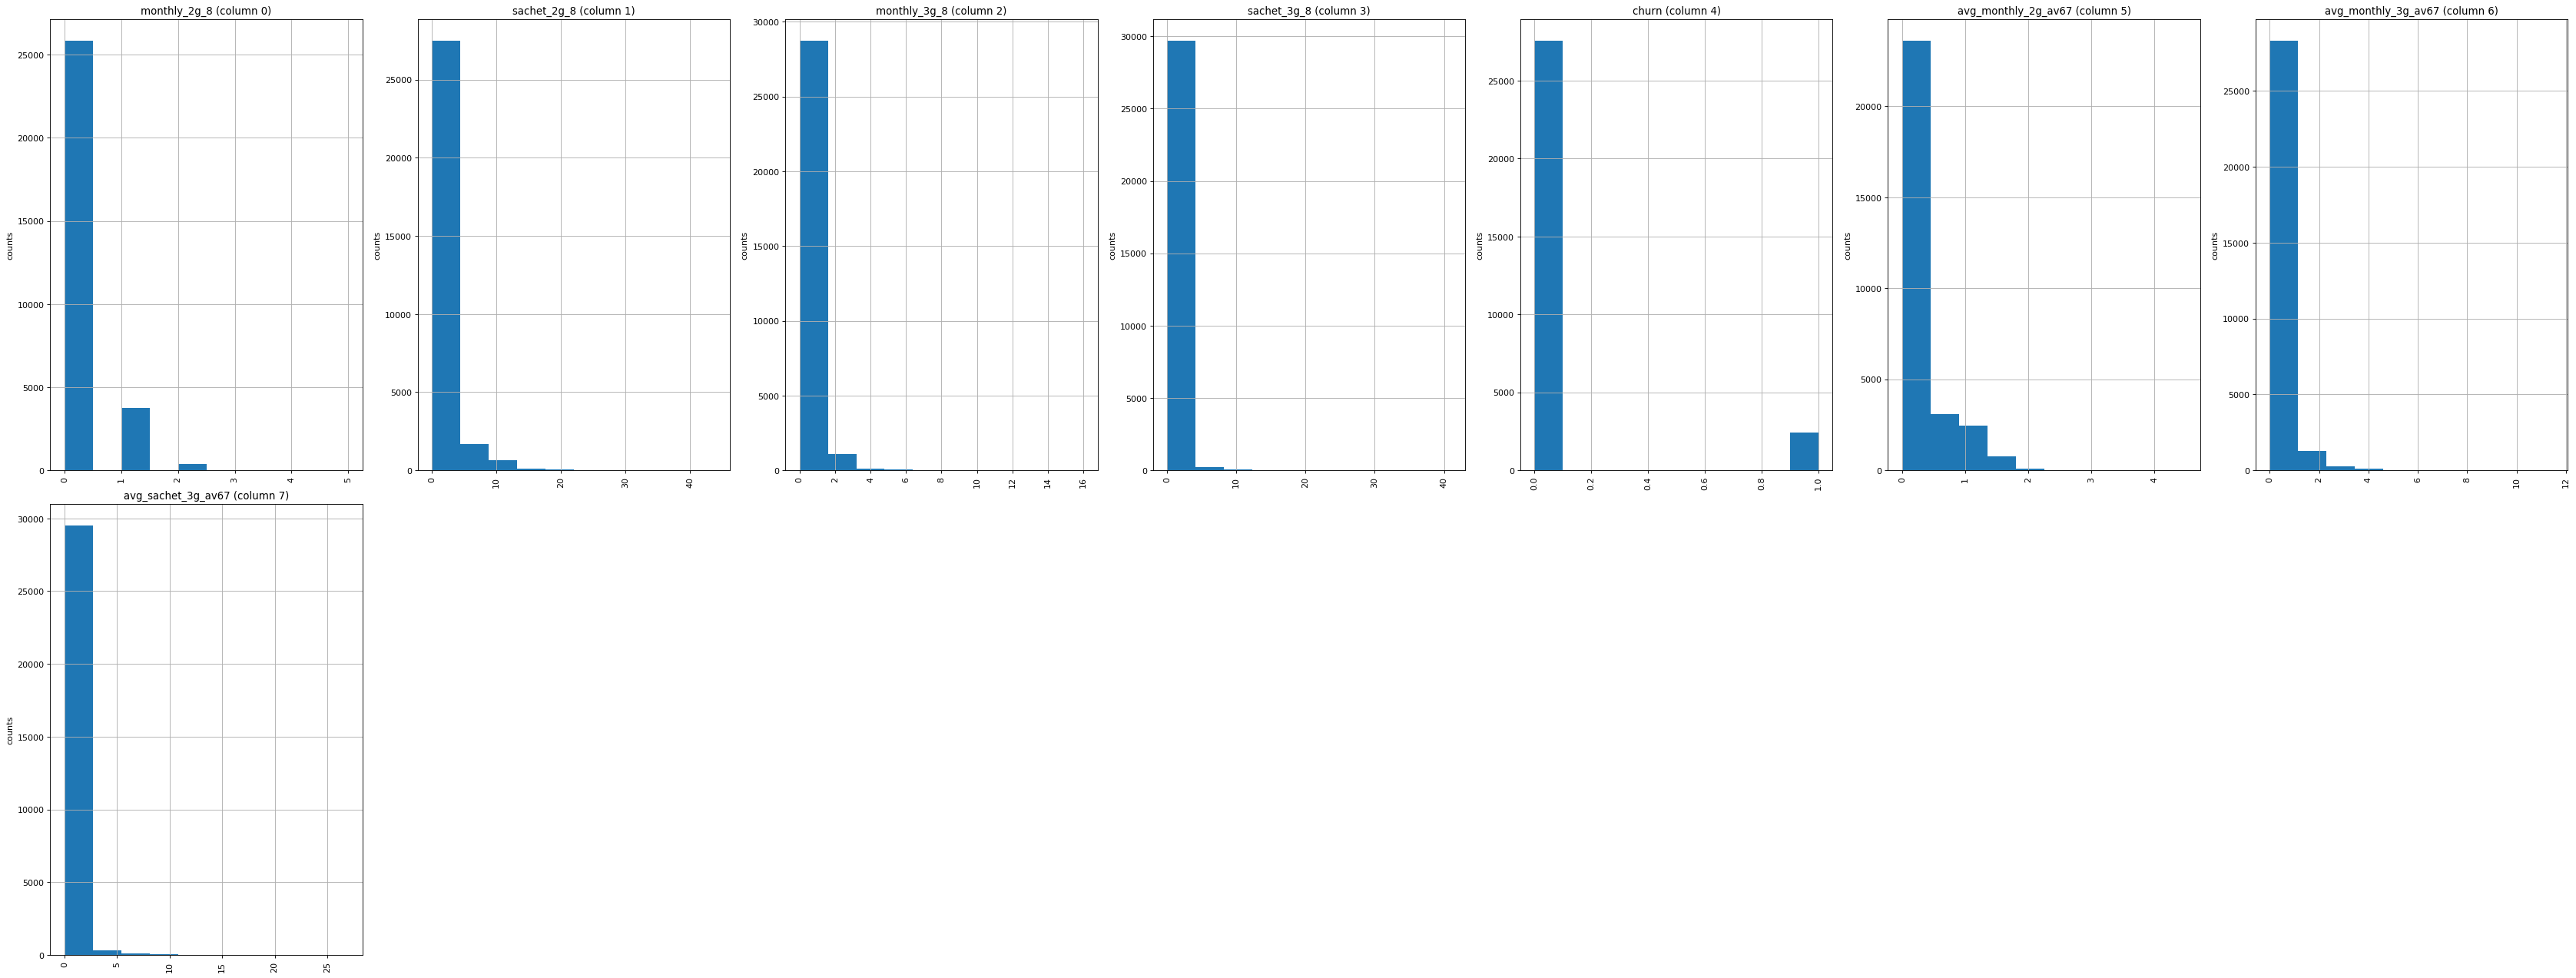

In [32]:
plotPerColumnDistribution(df_high_val_cust, 12, 7)

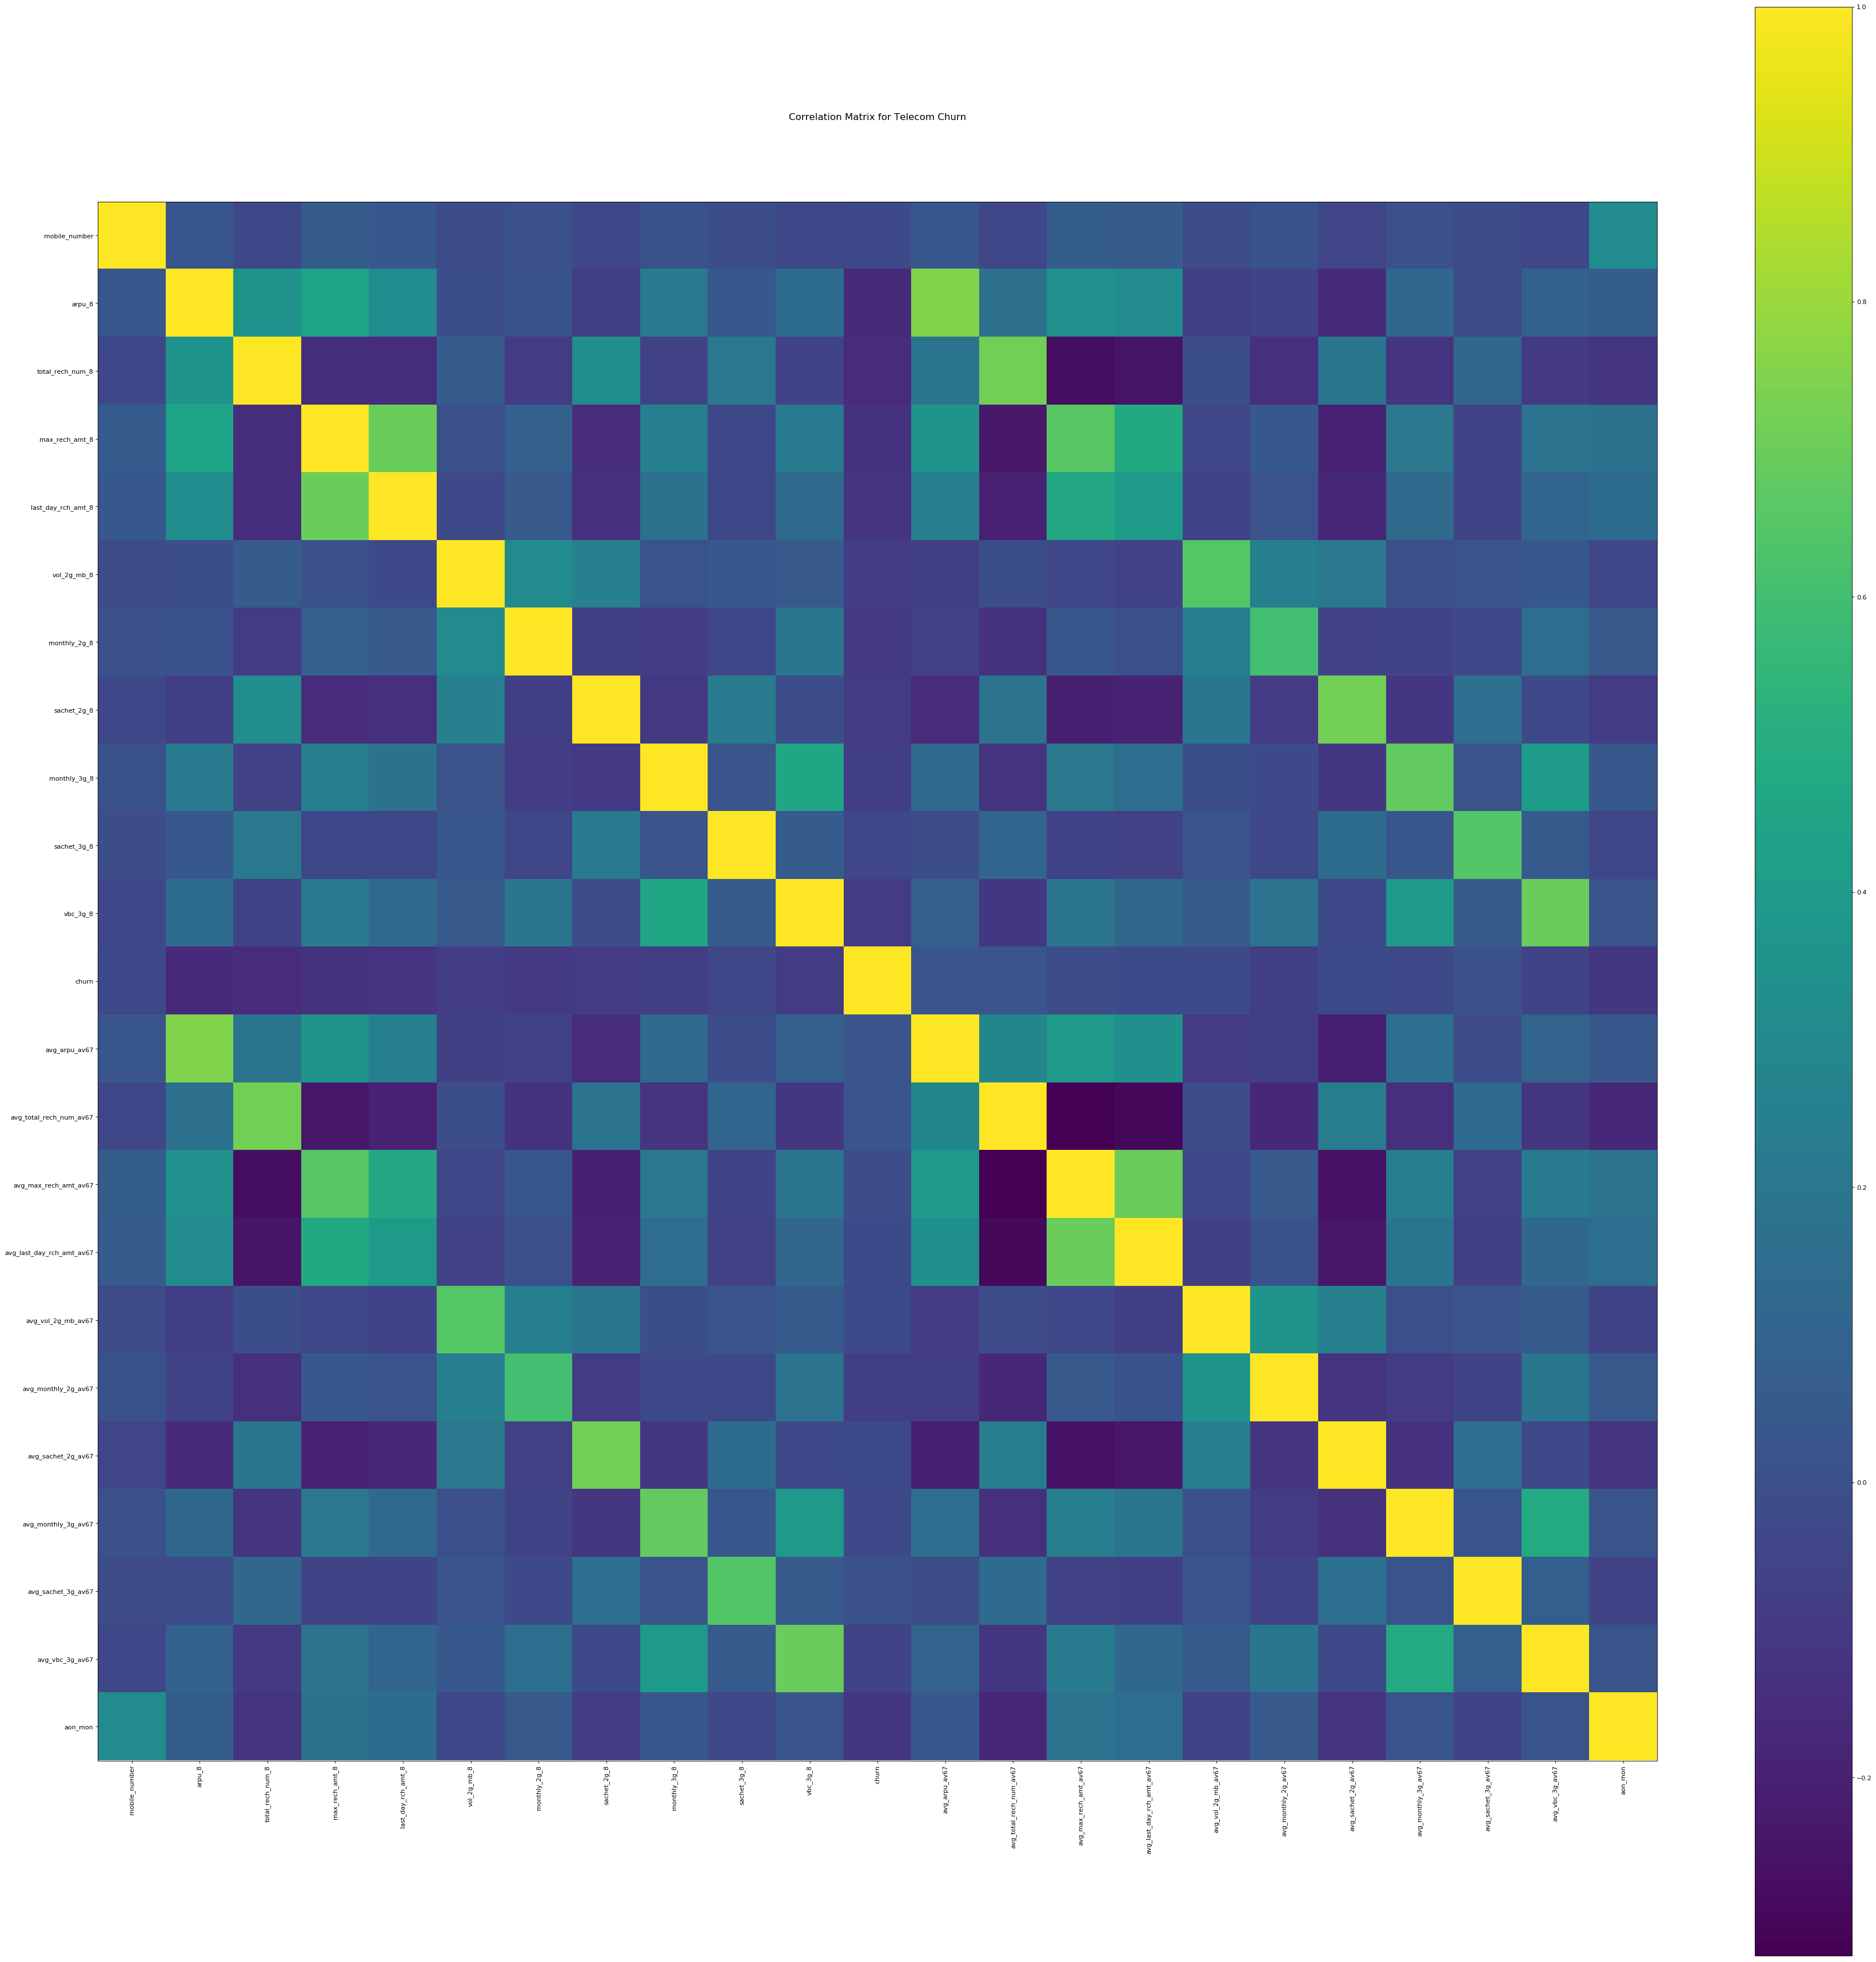

In [33]:
# Corelation matrix
plotCorrelationMatrix(df_high_val_cust, 55)

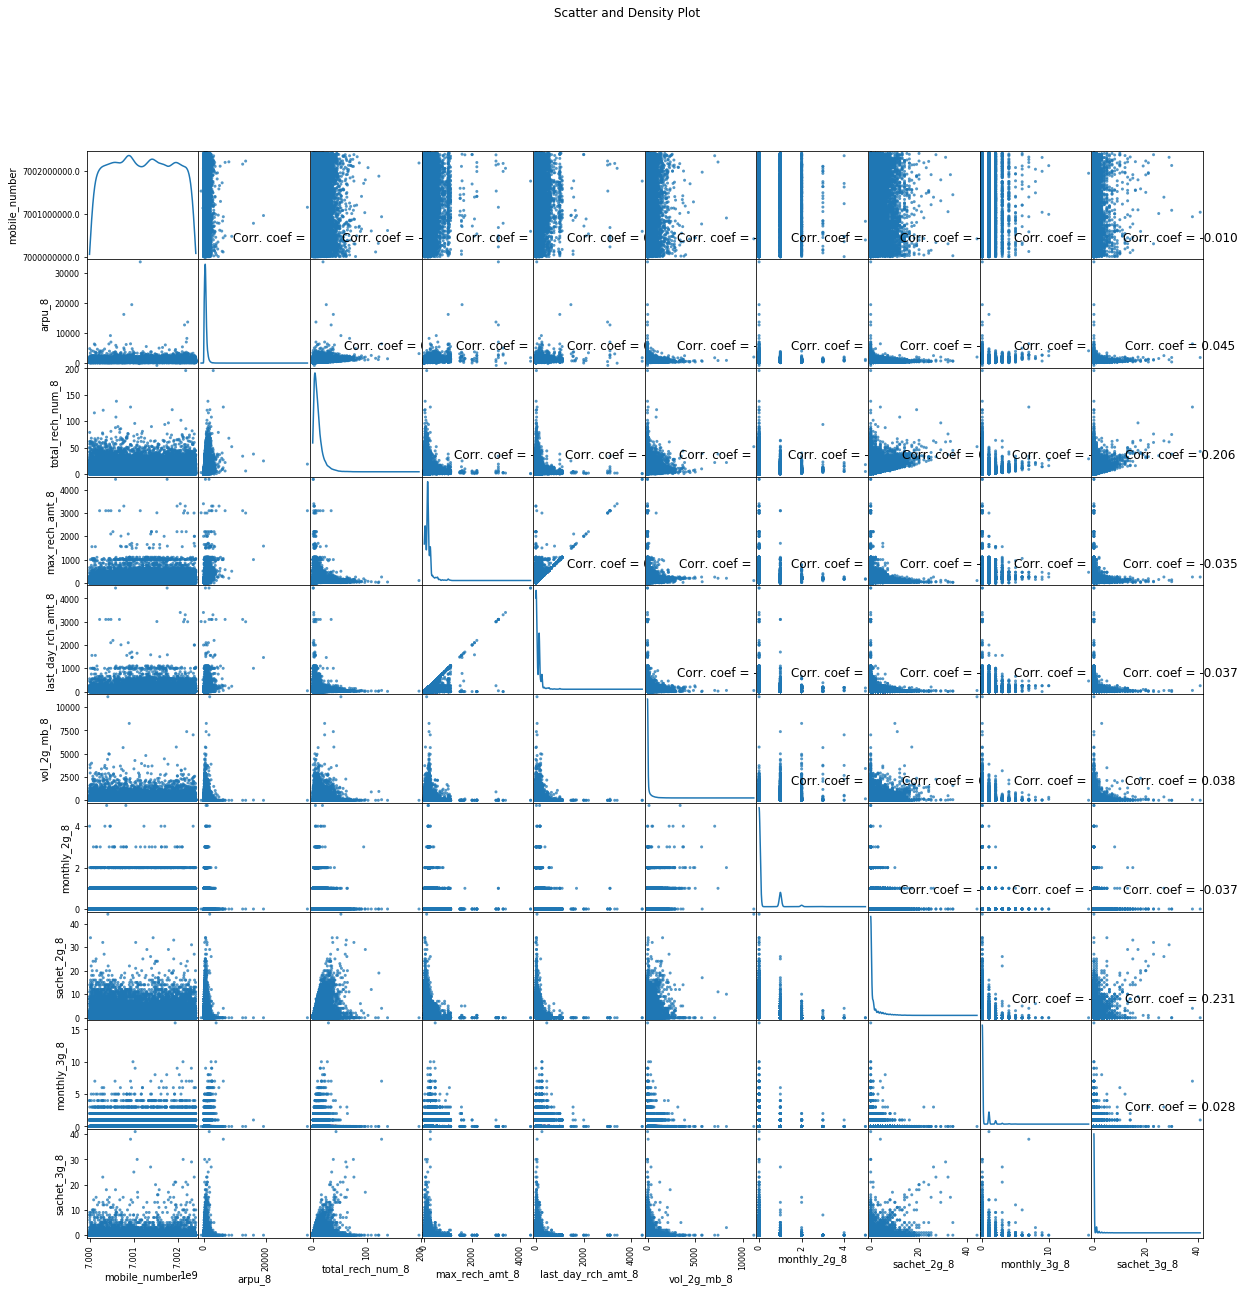

In [34]:
# Scatter and density plots
plotScatterMatrix(df_high_val_cust, 20, 12)

Text(0.5, 1.0, 'Customers by their tenure')

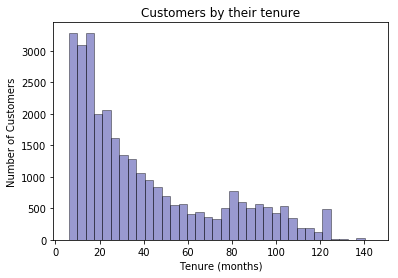

In [35]:
ax = sns.distplot(df_high_val_cust['aon_mon'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Customers by their tenure')

In [36]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
df_high_val_cust['tenure_range'] = pd.cut(df_high_val_cust['aon_mon'], tn_range, labels=tn_label)
df_high_val_cust['tenure_range'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): [0-6 Months < 6-12 Months < 1-2 Yrs < 2-5 Yrs < 5 Yrs and above]

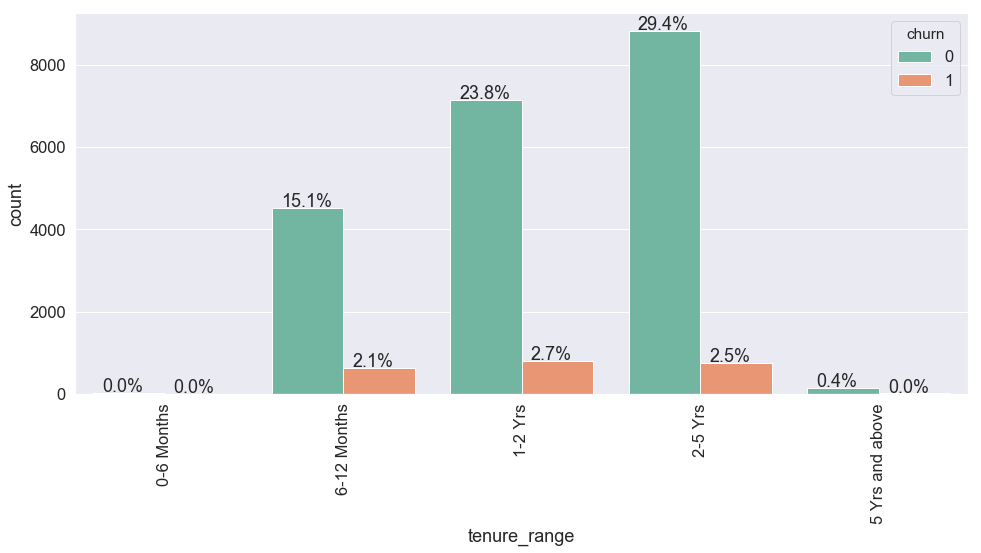

In [37]:
sns.set()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

temp = pd.Series(data = 'tenure_range')
fig, ax = plt.subplots()
width = len(df_high_val_cust['tenure_range'].unique()) + 6 + 4*len(temp.unique())
fig.set_size_inches(width , 7)

total = float(len(df_high_val_cust.index))
ax = sns.countplot(x="tenure_range", data=df_high_val_cust, palette="Set2", hue = "churn");
for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df_high_val_cust))), (p.get_x()+0.05, p.get_height()+20))
plt.xticks(rotation=90)
plt.show()

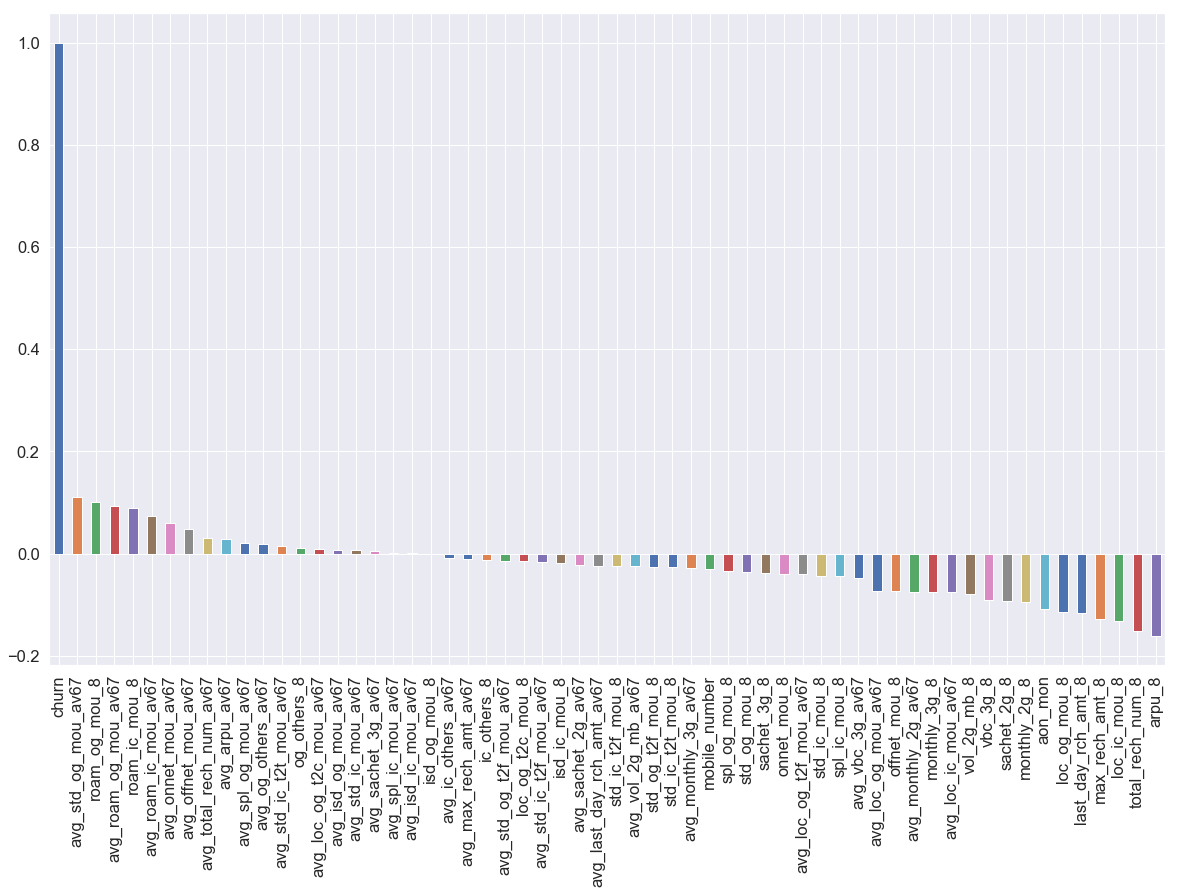

In [38]:
# Corelation of churn 

plt.figure(figsize=(20,12))
df_high_val_cust.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

#### Positively correlated with Churn - Avg STD Outgoing calls for 6th, 7th Month & Outgoing calls while in roaming
#### Negatively correlated with Churn - Revenue, Recharge for 8th Month

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


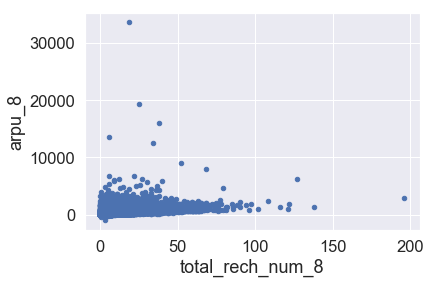

In [39]:
# Relation between Total recharge in 8th month Vs Average revenue in 8th month

df_high_val_cust[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


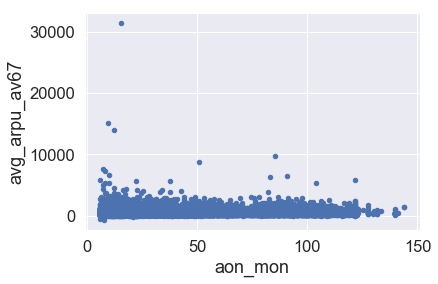

In [40]:
# Relation between tenure and revenue

df_high_val_cust[['aon_mon', 'avg_arpu_av67']].plot.scatter(x = 'aon_mon',
                                                              y='avg_arpu_av67')

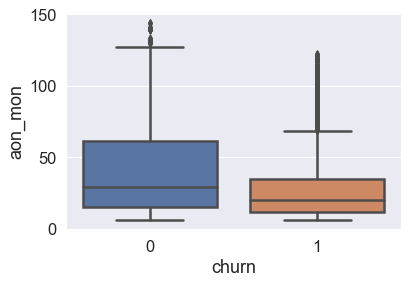

In [41]:
# Relation between churn and Tenure

sns.boxplot(x = df_high_val_cust.churn, y = df_high_val_cust.aon_mon)

Customers who do not churn tend to stay for longer tenure 

Text(0.5, 1.0, 'Distribution of Volume based cost by churn')

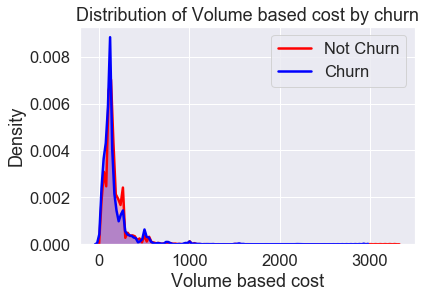

In [42]:
# Relation between churn and volume based cost

ax = sns.kdeplot(df_high_val_cust.avg_max_rech_amt_av67[(df_high_val_cust["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(df_high_val_cust.avg_max_rech_amt_av67[(df_high_val_cust["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Volume based cost by churn')

There is no much difference in volume based churn and no churn

Text(0.5, 1.0, 'Distribution of Max Recharge Amount by churn')

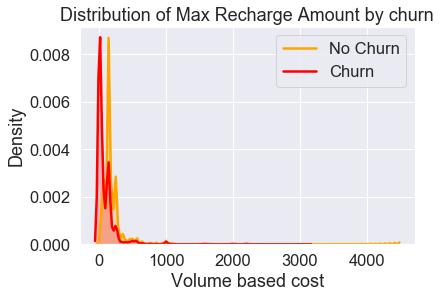

In [43]:
# Churn vs maximum recharge amount

ax = sns.kdeplot(df_high_val_cust.max_rech_amt_8[(df_high_val_cust["churn"] == 0)],
                color="Orange", shade = True)
ax = sns.kdeplot(df_high_val_cust.max_rech_amt_8[(df_high_val_cust["churn"] == 1)],
                ax =ax, color="Red", shade= True)
ax.legend(["No Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')

People who recharge with less amount are most likely to churn

In [44]:
# Creating new dataframe for model

df = df_high_val_cust[:].copy()

# Dropping tenure_range since there is AON month and columns are highly coorelated
df.drop('tenure_range', axis=1, inplace=True)
df.drop('mobile_number', axis=1, inplace=True)

# Since all values are realted to Price/ Cost/ Amount, Filling NaN with 0

df.fillna(0, inplace=True)

In [45]:
X = df.drop(['churn'], axis=1)
y = df['churn']

df.drop('churn', axis=1, inplace=True)

In [46]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

# Split Train-Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

## Model Building

In [47]:
# SVM - Support Vector Machine

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

lr = LogisticRegression()

lr.svm = SVC(kernel='linear') 
lr.svm.fit(X_train,y_train)
preds = lr.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.9170138310281619

In [48]:
# RFE

# Feature reduction using RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.feature_selection import RFE

# running RFE with 15 variables as output
rfe = RFE(lr, 15)   
rfe = rfe.fit(X_train, y_train)

In [49]:
rfe_features = list(df.columns[rfe.support_])
print("Features identified by RFE ", rfe_features)

Features identified by RFE  ['arpu_8', 'loc_og_mou_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'vbc_3g_8', 'avg_arpu_av67', 'avg_loc_ic_mou_av67']


In [50]:
X_rfe = pd.DataFrame(data=X_train).iloc[:, rfe.support_]
y_rfe = y_train

### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1)
lr.fit(X_rfe, y_rfe)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

y_pred = lr.predict(X_test_rfe)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[5467   36]
 [ 387  111]]


In [53]:
print('Accuracy of Logistic Regression Model on test set is ',lr.score(X_test_rfe, y_test))

Accuracy of Logistic Regression Model on test set is  0.929511748041993


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5503
           1       0.76      0.22      0.34       498

   micro avg       0.93      0.93      0.93      6001
   macro avg       0.84      0.61      0.65      6001
weighted avg       0.92      0.93      0.91      6001



In [55]:
# To get the weights of all the variables
weights = pd.Series(lr.coef_[0],
                 index=rfe_features)
weights.sort_values(ascending = False)

avg_arpu_av67          0.629179
avg_loc_ic_mou_av67    0.472514
vol_2g_mb_8           -0.227328
vbc_3g_8              -0.292148
sachet_3g_8           -0.305239
std_ic_t2f_mou_8      -0.340174
monthly_3g_8          -0.418613
total_rech_num_8      -0.463509
loc_og_mou_8          -0.476048
monthly_2g_8          -0.479452
last_day_rch_amt_8    -0.525455
sachet_2g_8           -0.562606
arpu_8                -0.654389
spl_ic_mou_8          -0.743000
loc_ic_mou_8          -2.427705
dtype: float64

### Model accuracy is 92.9%

### PCA

In [56]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='auto', tol=0.0, whiten=False)

In [57]:
X_train_pca = pca.fit_transform(X_train)
print(X_train_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(24000, 58)
(6001, 58)


### Applying logistic regression

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca = LogisticRegression(C=1e9)
lr_pca.fit(X_train_pca, y_train)

# Predicted probabilities
y_pred = lr_pca.predict(X_test_pca)

# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[5453   50]
 [ 367  131]]


In [60]:
print("Logistic Regression accuracy with PCA: ",accuracy_score(y_test,y_pred))

Logistic Regression accuracy with PCA:  0.9305115814030995


In [61]:
col = list(df.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})

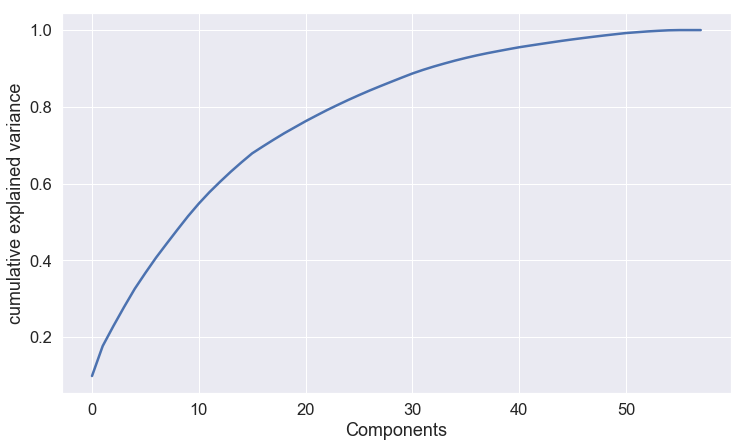

In [62]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components')
plt.ylabel('cumulative explained variance')
plt.show()

In [63]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 9.81, 17.62, 22.82, 27.78, 32.53, 36.68, 40.67, 44.34, 47.95,
       51.48, 54.74, 57.72, 60.45, 63.06, 65.51, 67.84, 69.64, 71.39,
       73.08, 74.65, 76.22, 77.68, 79.12, 80.46, 81.77, 83.02, 84.23,
       85.37, 86.48, 87.58, 88.66, 89.61, 90.48, 91.28, 92.04, 92.73,
       93.37, 93.95, 94.48, 95.  , 95.5 , 95.93, 96.35, 96.76, 97.17,
       97.55, 97.91, 98.25, 98.58, 98.89, 99.2 , 99.41, 99.62, 99.78,
       99.92, 99.98, 99.98, 99.98])

In [64]:
# Applying LR with 32 columns, 92.8% variance

pca_32 = PCA(n_components=32)

df_tr_pca_32 = pca_32.fit_transform(X_train)
print(df_tr_pca_32.shape)

df_test_pca_32 = pca_32.transform(X_test)
print(df_test_pca_32.shape)

(24000, 32)
(6001, 32)


In [65]:
# Running the model using selected variables

lr_pca1 = LogisticRegression(C=1e9)
lr_pca1.fit(df_tr_pca_32, y_train)

# Predicted probabilities
y_pred32 = lr_pca1.predict(df_test_pca_32)

# Converting y_pred to a dataframe which is an array
df_y_pred = pd.DataFrame(y_pred32)

In [66]:
print(confusion_matrix(y_test,y_pred32))

[[5440   63]
 [ 388  110]]


In [67]:
print("Logistic Regression accuracy with PCA = ",accuracy_score(y_test,y_pred32))

Logistic Regression accuracy with PCA =  0.924845859023496


### Model accuracy is 92.4%

### Decision Trees

In [68]:
# Feature selection using LASSO

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X_train)
pos = model.get_support(indices=True)

# Feature reduction using RFE
print(X_lasso.shape)
print(pos)

(24000, 18)
[ 0  4  6 12 16 19 20 21 22 23 24 27 28 32 37 48 52 57]


In [69]:
#feature vector for decision tree
lasso_features = list(df.columns[pos])
print("Features for LASSO model buidling: ", lasso_features)

Features for LASSO model buidling:  ['arpu_8', 'roam_og_mou_8', 'loc_og_mou_8', 'loc_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'vbc_3g_8', 'avg_arpu_av67', 'avg_roam_og_mou_av67', 'avg_std_og_mou_av67', 'avg_total_rech_num_av67', 'avg_monthly_2g_av67', 'aon_mon']


In [70]:
# Decision tree with default hyperparameter 

# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Fitting the decision tree with default hyperparameters
# max_depth = 5 (so that we can plot and read the tree)
dtcls = DecisionTreeClassifier(max_depth=5)
dtcls.fit(X_lasso, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [71]:
# The evaluation metrics of our default model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
X_test = pd.DataFrame(data=X_test).iloc[:, pos]
y_pred1 = dtcls.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5503
           1       0.71      0.49      0.58       498

   micro avg       0.94      0.94      0.94      6001
   macro avg       0.83      0.74      0.77      6001
weighted avg       0.93      0.94      0.94      6001



In [72]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred1))
print('Accuracy of Decision Tree =',accuracy_score(y_test,y_pred1))

[[5401  102]
 [ 254  244]]
Accuracy of Decision Tree = 0.940676553907682


#### Hyperparameter tuning

In [73]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# Number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dt = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dt, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_lasso, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [74]:
# scores of GridSearch CV
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.101916,0.013273,0.004329,0.005839,1,{'max_depth': 1},0.926265,0.925432,0.929792,0.933319,...,0.929333,0.003070,11,0.930153,0.930361,0.929271,0.928389,0.928754,0.929385,0.000767
1,0.193335,0.028108,0.000000,0.000000,2,{'max_depth': 2},0.940012,0.939596,0.942500,0.942488,...,0.941375,0.001292,4,0.941768,0.941872,0.941146,0.941149,0.941201,0.941427,0.000323
2,0.270184,0.031104,0.000000,0.000000,3,{'max_depth': 3},0.940637,0.940221,0.942708,0.943738,...,0.942250,0.001551,2,0.942705,0.942757,0.942187,0.941930,0.941930,0.942302,0.000363
3,0.335978,0.018225,0.003131,0.006262,4,{'max_depth': 4},0.940846,0.940637,0.943542,0.946030,...,0.943083,0.002075,1,0.944320,0.944789,0.943802,0.943388,0.944013,0.944063,0.000473
4,0.434708,0.063926,0.004724,0.005736,5,{'max_depth': 5},0.938554,0.939388,0.941875,0.945405,...,0.941583,0.002446,3,0.945935,0.946091,0.946042,0.944534,0.945420,0.945604,0.000586


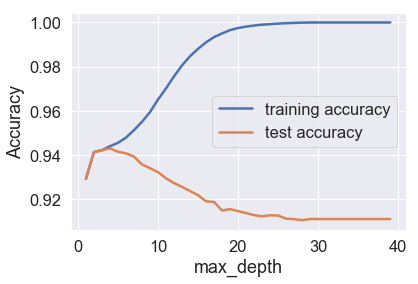

In [75]:
# plotting accuracies with max_depth

plt.figure()
plt.plot(score["param_max_depth"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_max_depth"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

max depth = 5 looks optimal

In [76]:
# Tuning min sample leaf

# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_lasso, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [77]:
# scores of GridSearch CV
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.135164,0.262565,0.000000,0.000000,5,{'min_samples_leaf': 5},0.927099,0.927515,0.925417,0.925193,...,0.925375,0.002072,10,0.967759,0.967186,0.967552,0.966408,0.966877,0.967156,0.000481
1,0.716862,0.278112,0.004121,0.006060,25,{'min_samples_leaf': 25},0.937305,0.938763,0.939792,0.937279,...,0.938542,0.001077,9,0.948904,0.949164,0.949271,0.948492,0.948128,0.948792,0.000427
2,0.826405,0.052792,0.005123,0.005707,45,{'min_samples_leaf': 45},0.940637,0.938138,0.941250,0.942488,...,0.940792,0.001455,7,0.946456,0.945362,0.945677,0.945576,0.945576,0.945729,0.000377
3,0.798029,0.069620,0.005723,0.005238,65,{'min_samples_leaf': 65},0.938971,0.938971,0.941667,0.941446,...,0.940625,0.001365,8,0.944528,0.944268,0.944479,0.944690,0.944378,0.944469,0.000142
4,0.788450,0.139465,0.003925,0.006052,85,{'min_samples_leaf': 85},0.940012,0.941262,0.941875,0.942280,...,0.941708,0.001039,2,0.944476,0.943903,0.944167,0.944222,0.943701,0.944094,0.000268


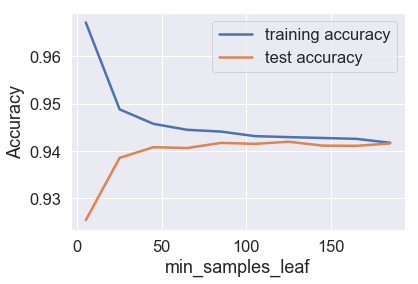

In [78]:
# plotting accuracies with min_samples_leaf

plt.figure()
plt.plot(score["param_min_samples_leaf"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_min_samples_leaf"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

min_samples_leaf = 25 looks to be optimal

In [79]:
# Tuning min_sample_leaf

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_lasso, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [80]:
# Scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.302692,0.104650,0.010375,0.006622,5,{'min_samples_split': 5},0.910644,0.913351,0.919792,0.915191,...,0.913833,0.003494,10,0.990781,0.990572,0.991771,0.990053,0.991198,0.990875,0.000580
1,1.262366,0.200115,0.011024,0.009448,25,{'min_samples_split': 25},0.922100,0.930431,0.932708,0.926443,...,0.926792,0.004261,9,0.964529,0.965675,0.964323,0.965314,0.965106,0.964990,0.000499
2,1.229314,0.086644,0.002606,0.003206,45,{'min_samples_split': 45},0.930431,0.933972,0.934583,0.931652,...,0.931250,0.003199,8,0.957394,0.959060,0.957604,0.958336,0.958440,0.958167,0.000603
3,1.328178,0.209260,0.007449,0.007025,65,{'min_samples_split': 65},0.934180,0.936680,0.934792,0.935612,...,0.934375,0.002060,7,0.954633,0.955466,0.954167,0.954482,0.954534,0.954656,0.000434
4,1.201161,0.113059,0.005323,0.005715,85,{'min_samples_split': 85},0.934597,0.938554,0.937292,0.937070,...,0.936125,0.001979,6,0.952029,0.953123,0.952552,0.953232,0.952763,0.952740,0.000431


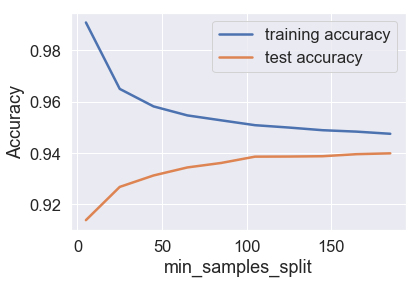

In [81]:
# plotting accuracies with min_samples_leaf

plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

min_samples_split = 100 looks optimal

In [82]:
# Creating parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(25, 175, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_lasso, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(25, 175, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [83]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results
# printing the optimal accuracy score and hyperparameters
print("Best Accuracy", grid_search.best_score_)

Best Accuracy 0.9428333333333333


In [84]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=25, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [85]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth = 5, 
                                  min_samples_leaf = 25,
                                  min_samples_split=100)
clf_gini.fit(X_lasso, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=25, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [86]:
# accuracy score
print ('Accuracy Score for Decision Tree Final Model = ',clf_gini.score(X_test,y_test))

Accuracy Score for Decision Tree Final Model =  0.940676553907682


### Model accuracy is 94%

## Random Forests

In [87]:
# random forests with default hyperparameters

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model_rf = RandomForestClassifier()
model_rf.fit(X_lasso, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print ('Randon Forest Accuracy with Default Hyperparameter',metrics.accuracy_score(y_test, prediction_test))

Randon Forest Accuracy with Default Hyperparameter 0.9388435260789868


In [88]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      5503
           1       0.72      0.43      0.54       498

   micro avg       0.94      0.94      0.94      6001
   macro avg       0.83      0.71      0.75      6001
weighted avg       0.93      0.94      0.93      6001



In [89]:
# Printing confusion matrix
print(confusion_matrix(y_test, prediction_test))

[[5419   84]
 [ 283  215]]


In [90]:
# Hyperparameter tuning

# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_lasso, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [91]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.409645,0.057850,0.012240,0.006058,2,{'max_depth': 2},0.933139,0.936263,0.939375,0.940821,...,0.938375,0.003290,4,0.935361,0.940570,0.940312,0.939430,0.939118,0.938958,0.001877
1,0.974748,0.088617,0.020228,0.006218,7,{'max_depth': 7},0.941679,0.942304,0.943333,0.945197,...,0.943250,0.001217,1,0.948695,0.949008,0.948073,0.947451,0.947451,0.948135,0.000635
2,1.394880,0.071533,0.030588,0.001301,12,{'max_depth': 12},0.940012,0.941887,0.939167,0.943947,...,0.941917,0.002115,2,0.970571,0.970155,0.971615,0.967658,0.971356,0.970271,0.001408
3,1.693165,0.298085,0.040625,0.007654,17,{'max_depth': 17},0.939804,0.943137,0.941667,0.937695,...,0.940875,0.001920,3,0.987447,0.988281,0.988021,0.988959,0.988334,0.988208,0.000490


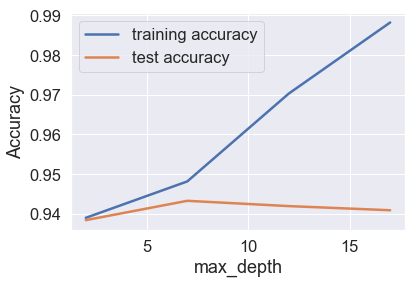

In [92]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [93]:
# tuning min_sample_leaf

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(50, 400, 10)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_lasso, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(50, 400, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

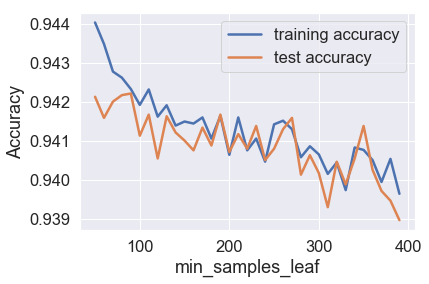

In [94]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

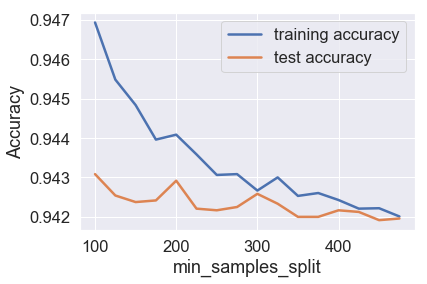

In [95]:
# tuning min_sample_split

n_folds = 5
parameters = {'min_samples_split': range(100, 500, 25)}
rf = RandomForestClassifier()

rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_lasso, y_train)

# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [96]:
# Grid search to find optimal hyperparameters

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 300, 100),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [500,700], 
    'max_features': [10,20,25]
}
# Creating a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

model_rf = RandomForestClassifier(bootstrap=True,
                                  max_depth=10,
                                  min_samples_leaf=100, 
                                  min_samples_split=200,
                                  n_estimators=1000 ,
                                  oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_features = 15,
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)

In [98]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction_test))
print(confusion_matrix(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5493
           1       0.72      0.41      0.52       508

   micro avg       0.94      0.94      0.94      6001
   macro avg       0.83      0.70      0.74      6001
weighted avg       0.93      0.94      0.93      6001

[[5413   80]
 [ 301  207]]


In [99]:
# Accuracy score
print ('Accuracy Score for Random Forest Final Model = ',metrics.accuracy_score(y_test, prediction_test))

Accuracy Score for Random Forest Final Model =  0.9365105815697384


### Model accuracy ~ 94%

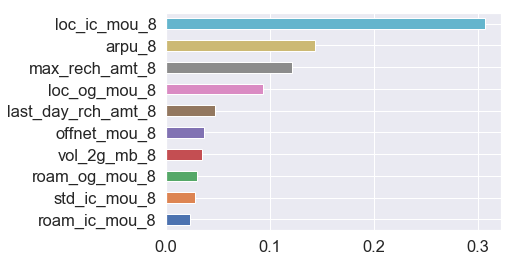

In [100]:
X = df
# Scaling all the variables to a range of 0 to 1
#from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
X = pd.DataFrame(scaler.transform(X))
X.columns = features

importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

## Results:

* Less number of "high value customers" (less than 10%) are churning which is a good service indicator.

* STD Outgoing Calls and Revenue Per Customer are strong indicators of Churn.

* Behaviour of Volume Based Cost is not a strong indicator of Churn.

* Max Recharge Amount is a potential Churn Indicator.

* Decision Tree/Random forests are the best methods to Predict Churn followed by other models.

* Behaviour is 8 Month can be the base of Churn Analysis.

* Local Incoming and Outgoing Calls for 8th Month and Average Revenue in 8th month are strong indicators of Churn behaviour.